Name: Aman Agarwal<br/>
Student ID: 1161131<br/>
Submission Details:<br/>
Course: Numerical Hydrodynamics (PHYS 7900)<br/>
Instructor: Dr. Daniel Siegel<br/>
Github link for the submission:<br/>

 Answer 1 a)

$u^{(1)}(x)= \frac{u(x+\Delta x)-u(x)}{\Delta x}$ (Forward Difference) <br/>
$u^{(1)}(x)= \frac{u(x+\frac{\Delta x}{2})-u(x-\frac{\Delta x}{2})}{\Delta x}$ (Centered Difference)<br/>
We know for $u(x)=\sin(x) \implies u^{(1)}(x)=\cos(x)$<br/>
Truncation error at point(x=1) = $u^{(1)}(1)- \cos(1)$; (where $u^{(1)}(x)$ is calculated using above differencing method and the argument is in radians).
In following cells, we will exceute this first order derivative and calculate the truncation error with different $\Delta x$

Functions implementing Forward and Centered Difference 

In [1]:
function forward_difference(x,dx)
    u = (sin(x+dx)-sin(x))/dx
    return u
end
function centered_difference(x,dx)
    u = (sin(x+dx/2)-sin(x-dx/2))/dx
    return u
end

centered_difference (generic function with 1 method)

$\Delta x =1$

In [20]:
FD1=forward_difference(1,1)
CD1=centered_difference(1,1)
truncation_error_fd1=FD1-cos(1)
truncation_error_cd1=CD1-cos(1)
println(FD1)
println(CD1)
println(truncation_error_fd1)
println(truncation_error_cd1)

0.0678264420177852
0.5180694479998514
-0.47247586385035456
-0.022232857868288325


$\Delta x =0.1$

In [21]:
FD2=forward_difference(1,0.1)
CD2=centered_difference(1,0.1)
truncation_error_fd2=FD2-cos(1)
truncation_error_cd2=CD2-cos(1)
println(FD2)
println(CD2)
println(truncation_error_fd2)
println(truncation_error_cd2)

0.4973637525353891
0.5400772080464322
-0.04293855333275065
-0.00022509782170754278


$\Delta x =0.01$

In [22]:
FD3=forward_difference(1,0.01)
CD3=centered_difference(1,0.01)
truncation_error_fd3=FD3-cos(1)
truncation_error_cd3=CD3-cos(1)
println(FD3)
println(CD3)
println(truncation_error_fd3)
println(truncation_error_cd3)

0.536085981011869
0.5403000546113312
-0.00421632485627077
-2.2512568085275575e-6


$\Delta x =0.001$

In [23]:
FD4=forward_difference(1,0.001)
CD4=centered_difference(1,0.001)
truncation_error_fd4=FD4-cos(1)
truncation_error_cd4=CD4-cos(1)
println(FD4)
println(CD4)
println(truncation_error_fd4)
println(truncation_error_cd4)

0.5398814803603269
0.5403022833555537
-0.0004208255078128609
-2.251258601759787e-8


Plotting the truncation errors

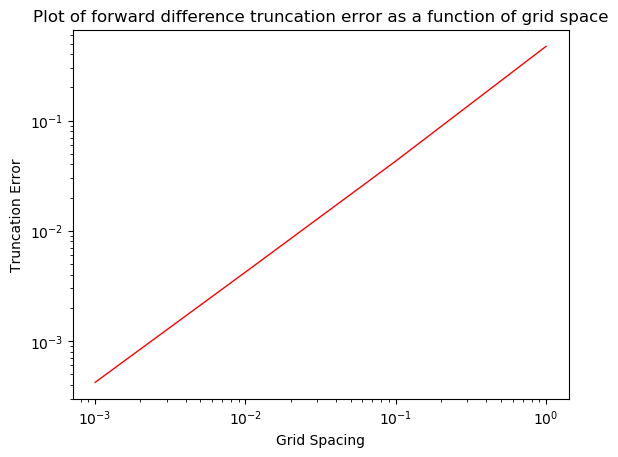

In [40]:
#Forward_Difference
using PyPlot
dx=[0.001,0.01,0.1,1]
truncation_error_FD=[abs(truncation_error_fd4),abs(truncation_error_fd3),abs(truncation_error_fd2),abs(truncation_error_fd1)]

 plt.figure(1)    
    plt.loglog(dx, truncation_error_FD, color="red", linewidth=1)
    title("Plot of forward difference truncation error as a function of grid space")
    xlabel("Grid Spacing")
    ylabel("Truncation Error")
    plt.show()

In [52]:
dx=[0.001,0.01,0.1,1]
truncation_error_FD=[abs(truncation_error_fd4),abs(truncation_error_fd3),abs(truncation_error_fd2),abs(truncation_error_fd1)]
for it in 1:4
    dx[it]=log(dx[it])
    truncation_error_FD[it]=log(truncation_error_FD[it])
end
fit = curve_fit(LinearFit,dx,truncation_error_FD)
print(fit)
#first parameter is the offset and the second parameter is the slope

LinearFit{Float64}([-0.7762527871804626, 1.0158746058313675])

So for the forward difference <br/>
$\log(Truncation Error)= 1.01*\log(\Delta x) -0.77$ <br/>
Hence the trucation error scales as $\mathcal{O}(\Delta x)$

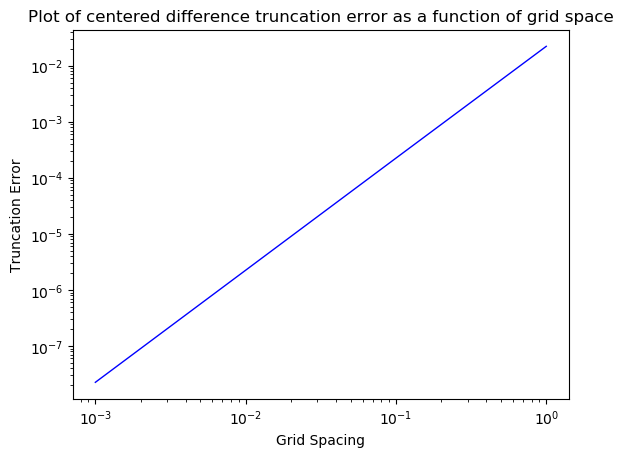

In [41]:
#Centered_Difference
using PyPlot
using CurveFit
dx=[0.001,0.01,0.1,1]
truncation_error_CD=[abs(truncation_error_cd4),abs(truncation_error_cd3),abs(truncation_error_cd2),abs(truncation_error_cd1)]

 plt.figure(2)    
    plt.loglog(dx, truncation_error_CD, color="blue", linewidth=1)
    title("Plot of centered difference truncation error as a function of grid space")
    xlabel("Grid Spacing")
    ylabel("Truncation Error")
    plt.show()

In [54]:
dx=[0.001,0.01,0.1,1]
truncation_error_CD=[abs(truncation_error_cd4),abs(truncation_error_cd3),abs(truncation_error_cd2),abs(truncation_error_cd1)]
for it in 1:4
    dx[it]=log(dx[it])
    truncation_error_CD[it]=log(truncation_error_CD[it])
end
fit = curve_fit(LinearFit,dx,truncation_error_CD)
print(fit)
#first parameter is the offset and the second parameter is the slope

LinearFit{Float64}([-3.802482925472025, 1.9983655972224774])

So for the Centered difference <br/>
$\log(Truncation Error)= 1.99*\log(\Delta x) -3.8$ <br/>
Hence the trucation error scales approximately as $\mathcal{O}(\Delta x^2)$

-------

Answer 1 b)

Ansatz: $D_2 u |_i = c_1u_i +c_2u_{i-1}+ c_3u_{i-2} + c_4u_{i-3}$ <br/>
From lecture we know-<br/>
$D_2 u |_i =\sum_{l=1}^{\infty} \frac{1}{(l-1)!}\sum_{m=1}^4 c_m (x_m - x_i)^{l-1} u^{(l-1)}$ + higher order terms<br/>
If we want to find second order derivative, we want the coefficient term with l-1=2 to be 1 and the rest to be zero; For now we will restrict ourselves to just first four derivative terms. So we have a linear system of equations-<br/> 
$c_1+c_2+c_3+c_4=0$<br/>
$-(c_2+2c_3+3c_4)\Delta x=0$<br/>
$\frac{1}{2}(c_2+4c_3+9c_4)(\Delta x)^2=1$<br/>
$\frac{1}{6}(c_2+8c_3+27c_4)(\Delta x)^3=1$<br/>
We get: <br/>
$c_1=\frac{2}{(\Delta x)^2},c_2=\frac{-5}{(\Delta x)^2},c_3=\frac{4}{(\Delta x)^2},c_4=\frac{-1}{(\Delta x)^2}$
<br/>
<br/>
So only the higher order term is left in $D_2 u|_i$ expansion. Lets consider only the first higher order term to find the accuracy<br/>
$D_2 u |_i- u^{(2)}_i= \frac{1}{24}(c_2+16c_3+81c_4)(\Delta x)^4$ + higher order terms<br/>
$D_2 u |_i- u^{(2)}_i= \frac{1}{24}(-22)(\Delta x)^2$ + higher order terms (on substituting the values of the coefficients)
<br/>
<br/>
Hence the scheme is second order accurate in space. Lets test this as done in Ans 1a.


In [37]:
function second_order_difference(x,dx)
    u = (2*sin(x)-5*sin(x-dx)+4*sin(x-2*dx)-sin(x-3*dx))/(dx)^2
    return u
end

second_order_difference (generic function with 1 method)

In [38]:
#Taking second order derivatives with varying dx
#I have taken here x=1.8 rather than x=1 as at x=1 due to x-dx=0(hence Sin(x=dx)=0) 
#when dx=1 is causing artificial suppression of error.
SD1=second_order_difference(1.8,1)
SD2=second_order_difference(1.8,0.1)
SD3=second_order_difference(1.8,0.01)
SD4=second_order_difference(1.8,0.001)

#calculating the truncation error
truncation_error_sd1=SD1-(-sin(1.8))
truncation_error_sd2=SD2-(-sin(1.8))
truncation_error_sd3=SD3-(-sin(1.8))
truncation_error_sd4=SD4-(-sin(1.8))

#printing the truncation errors
println(truncation_error_sd1)
println(truncation_error_sd2)
println(truncation_error_sd3)
println(truncation_error_sd4)

-0.5278757990760465
-0.009088863520483104
-8.949010117831335e-5
-8.928327677182324e-7


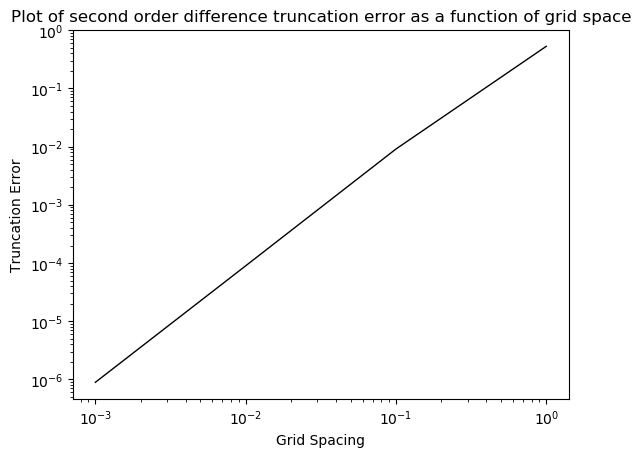

In [39]:
#plotting the truncation errors
using PyPlot
using CurveFit
dx=[0.001,0.01,0.1,1]
truncation_error_SD=[abs(truncation_error_sd4),abs(truncation_error_sd3),abs(truncation_error_sd2),abs(truncation_error_sd1)]

 plt.figure(2)    
    plt.loglog(dx, truncation_error_SD, color="black", linewidth=1)
    title("Plot of second order difference truncation error as a function of grid space")
    xlabel("Grid Spacing")
    ylabel("Truncation Error")
    plt.show()

In [40]:
dx=[0.001,0.01,0.1,1]
truncation_error_SD=[abs(truncation_error_sd4),abs(truncation_error_sd3),abs(truncation_error_sd2),abs(truncation_error_sd1)]
for it in 1:4
    dx[it]=log(dx[it])
    truncation_error_SD[it]=log(truncation_error_SD[it])
end
fit = curve_fit(LinearFit,dx,truncation_error_SD)
print(fit)
#first parameter is the offset and the second parameter is the slope

LinearFit{Float64}([-0.47387308317790056, 1.9322019475919283])

So for the second difference <br/>
$\log(Truncation Error)= 1.93*\log(\Delta x) -0.47$ <br/>
Hence the trucation error scales approximately as $\mathcal{O}(\Delta x^2)$

-----

Answer 2 a)

The equation is  <br/>
$u_t - v_d u_{xx}=0$<br/>
We need a stencil that is first order forward in time and second-order centered in space-<br/>
$u_t|_i^{n+1}= \frac{u_i^{n+1}-u_i^n}{\Delta t} +\mathcal{O}(\Delta t)$<br/>
$u_{xx}|_i^n= \frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{(\Delta x)^2} +\mathcal{O}((\Delta x)^2)$<br/>
$\frac{u_i^{n+1}-u_i^n}{\Delta t} = v_d \frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{(\Delta x)^2}$ <br/>
$u_i^{n+1}= u_i^n + \frac{v_d \Delta t}{(\Delta x)^2}(u_{i+1}^n-2u_i^n+u_{i-1}^n)$<br/>

<br/>
Let $\lambda=\frac{v_d \Delta t}{(\Delta x)^2}$<br/>
<br/>
<br/>

$$
\begin{pmatrix}
u_1^{n+1} \\
u_2^{n+1} \\
u_3^{n+1} \\
.\\
.\\
.\\
.\\
u_{m-1}^{n+1} \\
u_m^{n+1} \\
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 0 & 0 &.......& 0 & 0 \\
\lambda & 1-2\lambda & \lambda & 0 &.......& 0 & 0 \\
0 & \lambda & 1-2\lambda & \lambda &.......& 0 & 0 \\
.\\
.\\
.\\
.\\
0 & 0 & 0 & 0 &.......& 1-2\lambda & \lambda \\
0 & 0 & 0 & 0 &.......&  0 & 0 \\
\end{pmatrix}
\begin{pmatrix}
u_1^n \\
u_2^n \\
u_3^n \\
.\\
.\\
.\\
.\\
u_{m-1}^n \\
u_m^n \\
\end{pmatrix}
$$
<br/>
here 'm' is the number of spatial points in our grid, 'n' is a specific point in time, and we have applied the boundary conditions $u(0,t)=u(1,t)=0$ or $u_1=u_m=0$ at all times t. The matrix we get above, I will call that as derivative matrix henceforth.
The analytical solution given is-<br/>
<br/>
$v(x,t)=2\sum_{n=1}^{\infty}\sin(\frac{n\pi}{2})\sin(n\pi x)\exp(-\pi^2n^2\nu_dt)$
<br/>
<br/>
For our numerical scheme we will consider n going from 1 to 300 in the above formula. In above formula after n=300, the exponential is really low valued and hence can be ignored.

In [4]:
#function to calculate Derivative matrix
function derivative_matrix(dx,dt,v_d)
lambda=v_d*dt/dx^2    
N=convert(Int64,1/dx)+1; # Number of lattice points
Del_matrix=zeros(N,N) #Derivative matrix
    for i in 1:N, j in 1:N
        abs(i-j)<=1 && (Del_matrix[i,j]+=lambda)
        i==j && (Del_matrix[i,j]+=1-3*lambda)
    end
Del_matrix[1,1]=0
Del_matrix[1,2]=0
Del_matrix[N,N-1]=0    
Del_matrix[N,N]=0
return Del_matrix
end

derivative_matrix (generic function with 1 method)

In [5]:
function global_error(dx,dt,v_d)
    N=convert(Int64,1/dx)+1; # Number of lattice points
    u=zeros(N) #Defining the state vector array
    
    for it in 1:N
        x_value=0+(it-1)*dx
        for it2 in 1:300
            u[it]=u[it]+2*sin(it2*pi/2)*sin(it2*pi*x_value)*exp(-pi^2*(it2)^2*v_d*1) 
            #initialising the array with analytical solution at t=1
        end
    end
    
    Del_matrix=derivative_matrix(dx,dt,v_d)
    for t in 1:dt:3
        u=Del_matrix*u
    end
    
    v=zeros(N)#Analytical solution at t=3
    for it in 1:N
        x_value=0+(it-1)*dx
        for it2 in 1:300
            v[it]=v[it]+2*sin(it2*pi/2)*sin(it2*pi*x_value)*exp(-pi^2*(it2)^2*v_d*1+dt) 
            #inserting the analytical solution at t=3
        end
    end
    
     Global_error=zeros(N)
   @. Global_error=abs(u-v)/abs(v)
    Global_error[1]=1
  return Global_error      
end

global_error (generic function with 1 method)

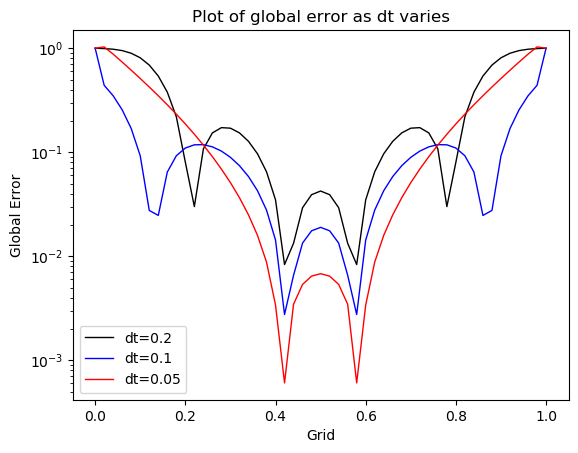

In [10]:
#plotting the global errors
#Ans 2b i)
using PyPlot
using CurveFit

#function to output the x-axis of the plot
function grid_x(dx)
    N=convert(Int64, 1/dx)+1
    u=zeros(N)
    for it in 1:N
        u[it]=0+(it-1)*dx
    end
    return u
end

 plt.figure(3) 
    fig, ax = plt.subplots()
    ax.semilogy(grid_x(0.02),global_error(0.02,0.2,0.001), color="black", linewidth=1, label="dt=0.2")
    ax.semilogy(grid_x(0.02),global_error(0.02,0.1,0.001) , color="blue",  linewidth=1, label="dt=0.1")
    ax.semilogy(grid_x(0.02),global_error(0.02,0.05,0.001) , color="red",  linewidth=1, label="dt=0.05")
    #ax.plot(grid_x(0.02),global_error(0.02,0.005,0.001) , color="brown",  linewidth=1, label="dt=0.3")
    title("Plot of global error as dt varies")
    xlabel("Grid")
    ylabel("Global Error")
    legend = ax.legend()

    plt.show()

So we see in the above plot that the global error is reducing in the middle and the numerical scheme is converging to the actual solution. Whereas near the boundaries, the global error doesn't seem to decreasing as dt is decreasing byt the solution is still stable. hence near the boundaries the numerical scheme is stable but not convergent.

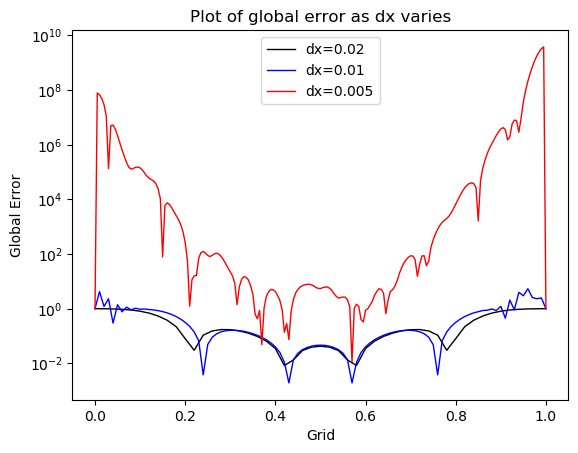

In [36]:
#Ans 2b ii)
 plt.figure(4)
    fig, ax = plt.subplots()
    plt.semilogy(grid_x(0.02),global_error(0.02,0.2,0.001), color="black", linewidth=1, label="dx=0.02")
    plt.semilogy(grid_x(0.01),global_error(0.01,0.2,0.001) , color="blue", linewidth=1, label="dx=0.01")
    plt.semilogy(grid_x(0.005),global_error(0.005,0.2,0.001) , color="red", linewidth=1, label="dx=0.005")
    title("Plot of global error as dx varies")
    xlabel("Grid")
    ylabel("Global Error")
    ax.legend()
    #ylim(0,5)
    plt.show()

In the above plot we see the errors are drastically increasing as dx is decreasing, hence hinting that the numerical scheme has gone into some unstable regime. This is exactly what we will see in 2c below

-----

Ans 2c)<br/>
The scheme we are using-

$u_{i}^{n+1}=u_{i}^{n}+ \lambda (u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$<br/>

$u_{i}^{n+1}=(1+ \lambda S_+ -2\lambda +\lambda S_- )u_i^n$<br/>

$g(e^{i\xi},e^{-i\xi})= 1+ \lambda e^{-i\xi} + -2\lambda +\lambda e^{i\xi}$<br/>

$g(e^{i\xi},e^{-i\xi})=1 -2 \lambda(1-\cos \xi)$<br/>

$g(e^{i\xi},e^{-i\xi})=1 -4 \lambda(\sin^2 \xi)$<br/>

We follow strict stability as there are no source terms which will cause amplification of modes. So for strict stability we want,<br/>

$|1 -4 \lambda(\sin^2 \xi)| \leq 1$<br/> 

$\implies -1 \leq 1 -4 \lambda(\sin^2 \xi) \leq 1$<br/>

The RHS is always satisfied as the term $4 \lambda(\sin^2 \xi)$ is always positive<br/>
$-1 \leq 1 -4 \lambda(\sin^2 \xi)$ {maximum value of $\sin^2 \xi$ is 1}<br/> 
$\lambda=\frac{v_d \Delta t}{(\Delta x)^2}\leq \frac{1}{2}$

Hence this is the criterion we get after doing a von-neumann stability analysis. According to Lax theorem, both stability and consistency are required for convergence. So wherever 
$\lambda=\frac{v_d \Delta t}{(\Delta x)^2}> \frac{1}{2}$, our solution is not stable, hence by Lax theorem we expect the solution is not convergent at that place too.

So we interpret our solutions obtained in 2b <br/> 

In 2b (i), we have $\lambda=\frac{1}{2},\frac{1}{4},\frac{1}{8}$, hence the scheme is always stable according to Von-Neumann stability, but as we observe, its not necessarily convergent at each point. Hence the CFL type condition($\lambda \leq 0.5$) we obtain here seems necessary but not sufficient.<br/><br/>


In 2b (ii), we have $\lambda=\frac{1}{2},2,8$, hence the scheme is not stable according to Von-Neumann stability in the latter two iterations, that is why we observe the errors increasing magnificently.<br/>

---

Ans 2 d) <br/> Inspiration taken from (https://ocw.mit.edu/courses/mathematics/18-336-numerical-methods-for-partial-differential-equations-spring-2009/lecture-notes/MIT18_336S09_lec14.pdf) <br/>


Lets perform the stability analysis for the Crank-Nicholson scheme-<br/>

Let $u_{i}^{n+1}= G u_i^n$<br/>
Crank Nicholson scheme-<br/>
$u_{i}^{n+1}- u_i^n= \frac{1}{2}\lambda(G+1)(u_{i+1}^{n}-2u_i^n+u_{i-1}^n)$<br/>
$u_{i}^{n+1}= u_i^n + \frac{1}{2}\lambda(G+1)(S_+-2+S_-)u_i^n$<br/>
$u_{i}^{n+1}= (1 + \frac{1}{2}\lambda(G+1)(S_+-2+S_-))u_i^n$<br/>

So the coefficient of $u_i^n$ must be G according to our definition<br/>
$G=(1 + \lambda(G+1)(S_+-2+S_-))$<br/>
$G(e^{i\xi},e^{-i\xi})=(1 + \frac{1}{2}\lambda(G(e^{i\xi},e^{-i\xi})+1)(e^{-i\xi}-2+e^{i\xi}))$<br/>
$\frac{G(e^{i\xi},e^{-i\xi})-1}{G(e^{i\xi},e^{-i\xi})+1}=\frac{1}{2}\lambda(2\cos(\xi)-2)$<br/>
$G(e^{i\xi},e^{-i\xi})=\frac{1+\lambda(\cos(\xi)-1)}{1-\lambda(\cos(\xi)-1)}$<br/>
$G(e^{i\xi},e^{-i\xi})=\frac{1-\lambda(1-\cos(\xi))}{1+\lambda(1-\cos(\xi))}$<br/>


$1-\cos(\xi) \geq 0$, So the above G is unconditionally <1, hence the Crank-Nicholson scheme is unconditionally stable


This work was done with the help of and interesting discussions with Boris Georgiev and Conner Dailey. A big thank you to them!